In [5]:
%load_ext autoreload
%autoreload 2

import numpy as np
# from blimpy import read_header, Waterfall, Filterbank


%matplotlib inline
import matplotlib.pyplot as plt

import sys, os, glob
sys.path.insert(0, "../")
import setigen as stg

from astropy import units as u

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# Intakes a cadence, ex: haystack_npy[cadence] of shape (273, 256)
# Returns numpy array with shape (6, 273, 256), representing 6 snippets of the cadence with constant signal injected

def inject_constant_path(haystack_snippet):
    merged_array = np.empty((1638, 256))
    new_array = np.empty((6, 273, 256))

    haystack_snippet_merge = np.concatenate(haystack_snippet, axis=0)
    frame = stg.Frame.from_data(df=0.00286102294921875*u.MHz,
                                dt=1.0737418239999998*u.s*6,
                                fch1=1926.26953125*u.MHz,
                                data=haystack_snippet_merge)
    signal = frame.add_signal(stg.constant_path(f_start=frame.get_frequency(index=np.random.randint(10, 250)),
                                                drift_rate=2*u.Hz/u.s),
                              stg.constant_t_profile(level=np.random.randint(1,6)),
                              stg.gaussian_f_profile(width=5*u.kHz),
                              stg.constant_bp_profile(level=np.random.randint(1,6)))

    numpydata = frame.get_data()
    print(numpydata.shape)
    fig = plt.figure(figsize=(10, 6))
    plt.imshow(numpydata, aspect='auto')
    plt.show()
    plt.xlabel('Frequency')
    plt.ylabel('Time')
    merged_array = numpydata
    
    start_index = 0
    end_index = 273
    for i in np.arange(0, 6):
        if i % 2 == 0:
            new_array[i] = merged_array[start_index:end_index]
            print("on")
            plt.imshow(new_array[i])
            plt.show()
            
        else:
            new_array[i] = haystack_snippet[i]
            print("off")
            plt.imshow(new_array[i])
            plt.show()
           
            
        start_index += 273
        end_index += 273
    
    return new_array

In [7]:
# Intakes a cadence, ex: haystack_npy[cadence] of shape (273, 256)
# Returns numpy array with shape (6, 273, 256), representing 6 snippets of the cadence with RFI signal injected

def inject_RFI_like_path(haystack_snippet):
    new_array = np.empty((6, 273, 256))
    for i in np.arange(0, 6):
        if i % 2 == 0:
            
            frame = stg.Frame.from_data(df=0.00286102294921875*u.MHz,
                                        dt=1.0737418239999998*u.s,
                                        fch1=1926.26953125*u.MHz,
                                        data=haystack_snippet[i])
            signal = frame.add_signal(stg.simple_rfi_path(f_start=frame.fs[np.random.randint(10, 250)],
                                     drift_rate=np.random.randint(-10, 10)*u.Hz/u.s,
                                     spread=np.random.randint(-6,6)*u.kHz,
                                     spread_type='uniform',
                                     rfi_type='random_walk'),
                 stg.constant_t_profile(level=np.random.randint(1,6)),
                 stg.box_f_profile(width=5*u.kHz),
                 stg.constant_bp_profile(level=np.random.randint(1,6)))
            
            numpydata = frame.get_data()
            fig = plt.figure(figsize=(10, 6))
            plt.imshow(numpydata, aspect='auto')
            plt.show()
            plt.xlabel('Frequency')
            plt.ylabel('Time')
            new_array[i] = numpydata
        else: 
            new_array[i] = haystack_snippet[i]
            plt.imshow(new_array[i])
   
    # do the same here (mix)
    return new_array
                              

In [8]:
from PIL import Image, ImageFont, ImageDraw
from scipy.ndimage import gaussian_filter
# download this first to open emoji https://github.com/MorbZ/OpenSansEmoji/blob/master/OpenSansEmoji.ttf
# need to make it more faint, noise on top of it
# bitmask,turn emoji into np arrays, gaussian blur

def inject_alien_emoji(haystack_snippet, cadence):
    injected_array = np.empty((6, 273, 256, 4))
    #alien_icon = plt.imread()
    for i in np.arange(0, 6):
        plt.imsave("cadence.png", haystack_npy[cadence][i], format = "PNG")
        im = Image.open("cadence.png")
        draw = ImageDraw.Draw(im)
        font = ImageFont.truetype("/home/shirley/ms-fonts/OpenSansEmoji.ttf", 32, encoding='unic')
        if i % 2 == 0:
            textToDraw = '👽'
        else:
            textToDraw = ''
        draw.text((np.random.randint(20, 240),np.random.randint(20, 240)), textToDraw, (0,0,0), font=font)
        im_array = np.array(im)
        injected_array[i] = im_array
        plt.imshow(im_array)
        plt.show()
    return injected_array

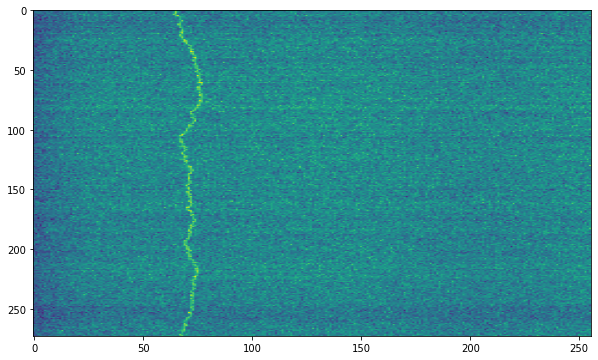

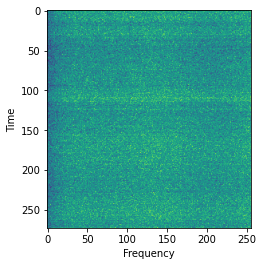

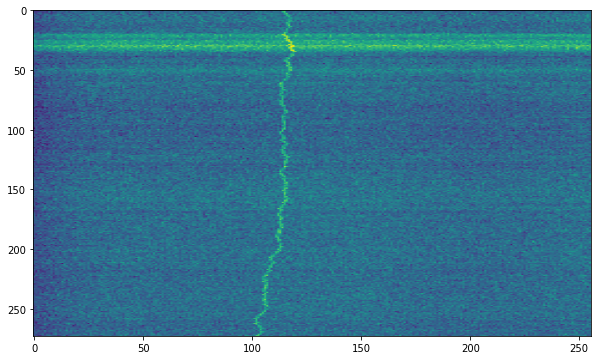

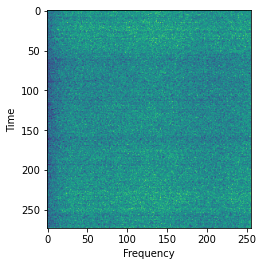

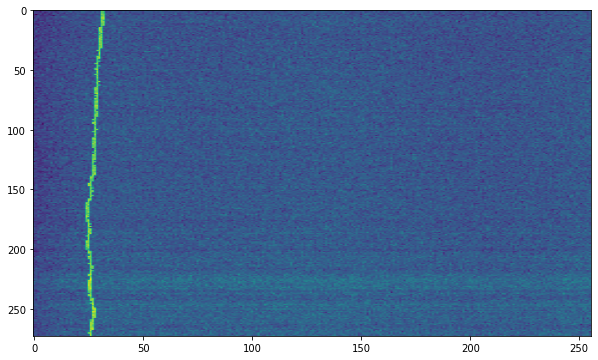

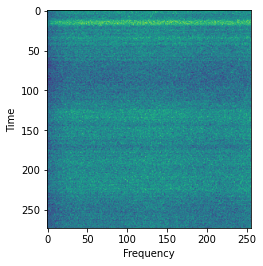

In [9]:
haystack_npy = np.load('draft_haystack_float32_tiny_v2.npy')
injected_npy = np.empty((1000, 6, 273, 256))

for cadence in np.arange(0, 1):
    injected_npy[cadence] = inject_RFI_like_path(haystack_npy[cadence])

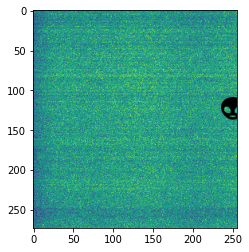

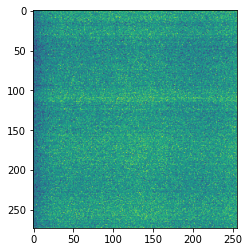

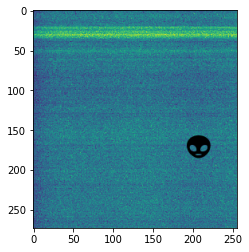

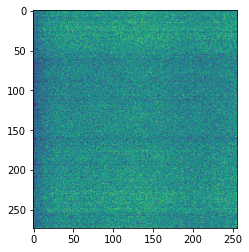

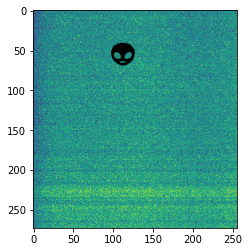

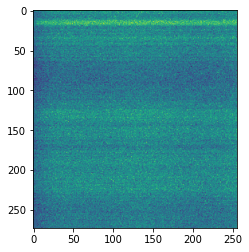

In [10]:
# first initial experiment with injecting emoji with no gaussian blur

haystack_npy = np.load('draft_haystack_float32_tiny_v2.npy')
injected_emoji_npy = np.empty((1000, 6, 273, 256, 4))

for cadence in np.arange(0, 1):
    injected_emoji_npy[cadence] = inject_alien_emoji(haystack_npy, cadence)

(40, 40, 3)


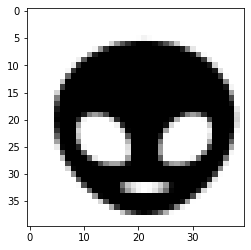

In [21]:
# download this first to open emoji https://github.com/MorbZ/OpenSansEmoji/blob/master/OpenSansEmoji.ttf
# get the numpy array of the emoji icon

from PIL import Image, ImageFont, ImageDraw
from scipy.ndimage import gaussian_filter

im = Image.new('RGB', (40, 40), (255, 255, 255))
draw = ImageDraw.Draw(im)
font = ImageFont.truetype("/home/shirley/ms-fonts/OpenSansEmoji.ttf", 36, encoding='unic')
textToDraw = '👽'
draw.text((0,0), textToDraw, (0,0,0), font=font)
im_array = np.array(im)
plt.imshow(im_array)
print(im_array.shape)

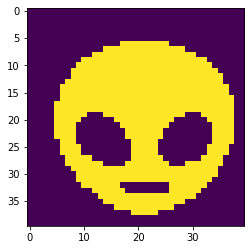

In [22]:
# use the np array of the icon to turn into a bitmap

bitmap = np.zeros((40, 40))
for i in range(40):
    for j in range(40):
        if im_array[i][j][0] < 100:
            bitmap[i][j] = 1
plt.imshow(bitmap)
#np.save('moon_bitmap.npy', bitmap)

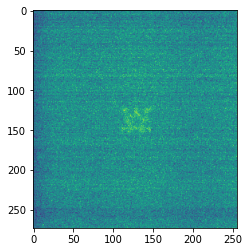

In [20]:
# overlay the bitmap onto the cadence image

background = haystack_npy[0][0]
overlay = bitmap
overlay = gaussian_filter(overlay, sigma=2)
overlay = np.pad(overlay, ((116, 117), (108, 108)))
plt.imshow(background+overlay*2.5)

In [97]:
img = cv2.imread('alien.png', cv2.IMREAD_UNCHANGED)
 
print('Original Dimensions : ',img.shape)
 
scale_percent = 20 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
print(resized.shape)
#plt.imshow(resized)

Original Dimensions :  (160, 160, 4)
(32, 32, 4)


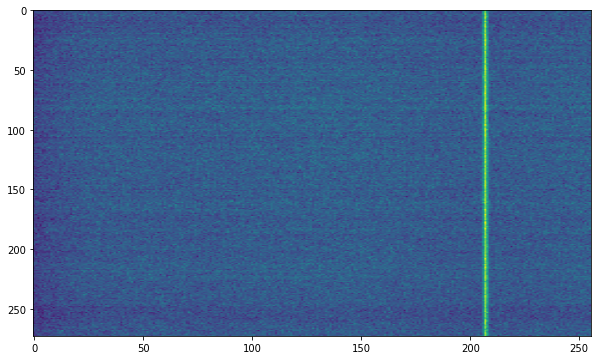

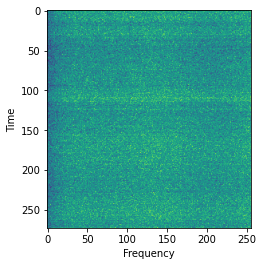

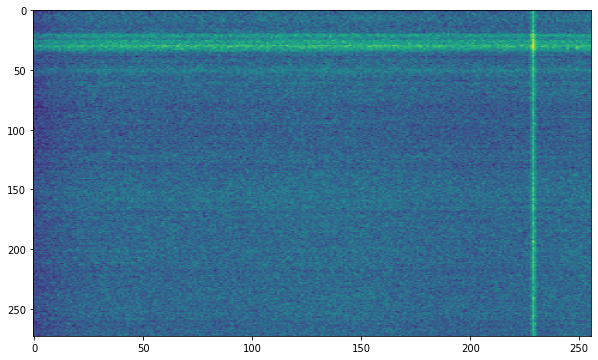

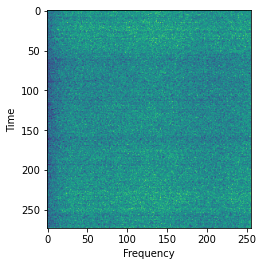

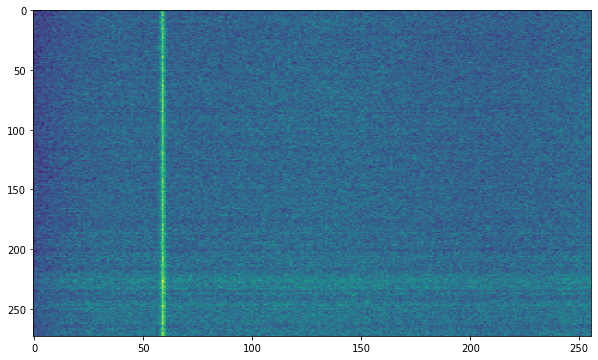

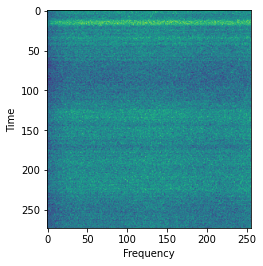

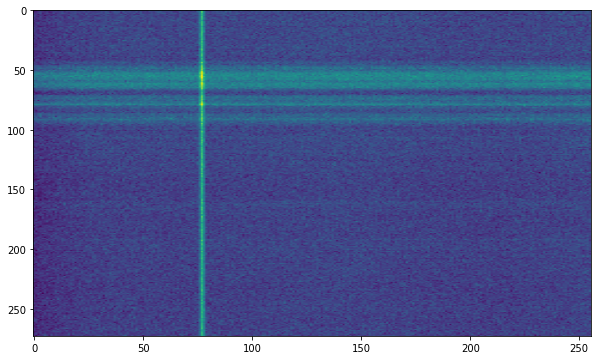

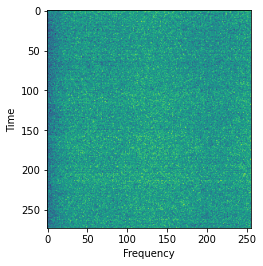

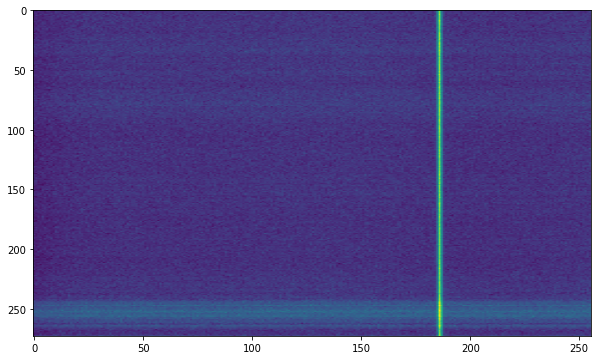

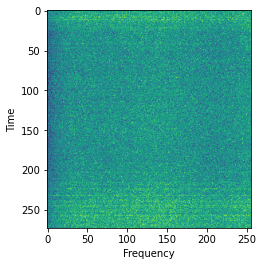

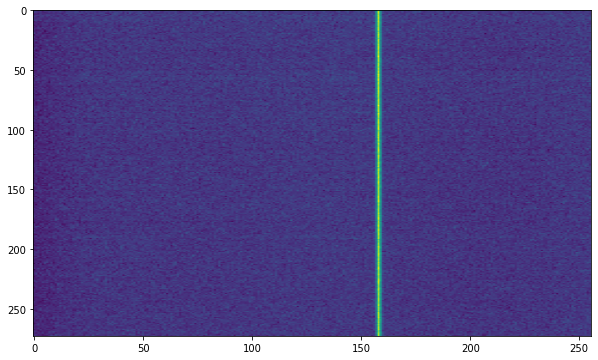

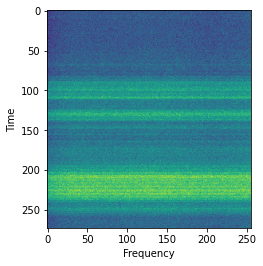

In [4]:
# old code kept here for backup purposes
haystack_npy = np.load('draft_haystack_float32_tiny_v2.npy')
new_array = np.empty((6, 273, 256))
injected_npy = np.empty((1000, 6, 273, 256))

#plt.imshow(haystack_npy[0][0], aspect = 'auto')
for cadence in np.arange(0, 2):
    # call constant path here
    for i in np.arange(0, haystack_npy.shape[1]):
        if i % 2 == 0:
            
            numpydata = inject_constant_path(haystack_npy[cadence][i])

            fig = plt.figure(figsize=(10, 6))
            plt.imshow(numpydata, aspect='auto')
            plt.show()
            plt.xlabel('Frequency')
            plt.ylabel('Time')
            new_array[i] = numpydata
        else: 
            new_array[i] = haystack_npy[cadence][i]
            plt.imshow(new_array[i])
           
    injected_npy[cadence] = new_array 